<a href="https://colab.research.google.com/github/yukina-t156/learningQiskit/blob/main/setup_qc4u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Computing for You


## 実機を使う場合
1. 取得したIBMトークンを以下のようにシークレットに設定する。
2. notebookで`use_IBMQ = True`を実行した後、setupを行う。

In [1]:
use_IBMQ = True
# 実機を利用しない場合は代わりに以下をコメントアウト
# use_IBMQ = False

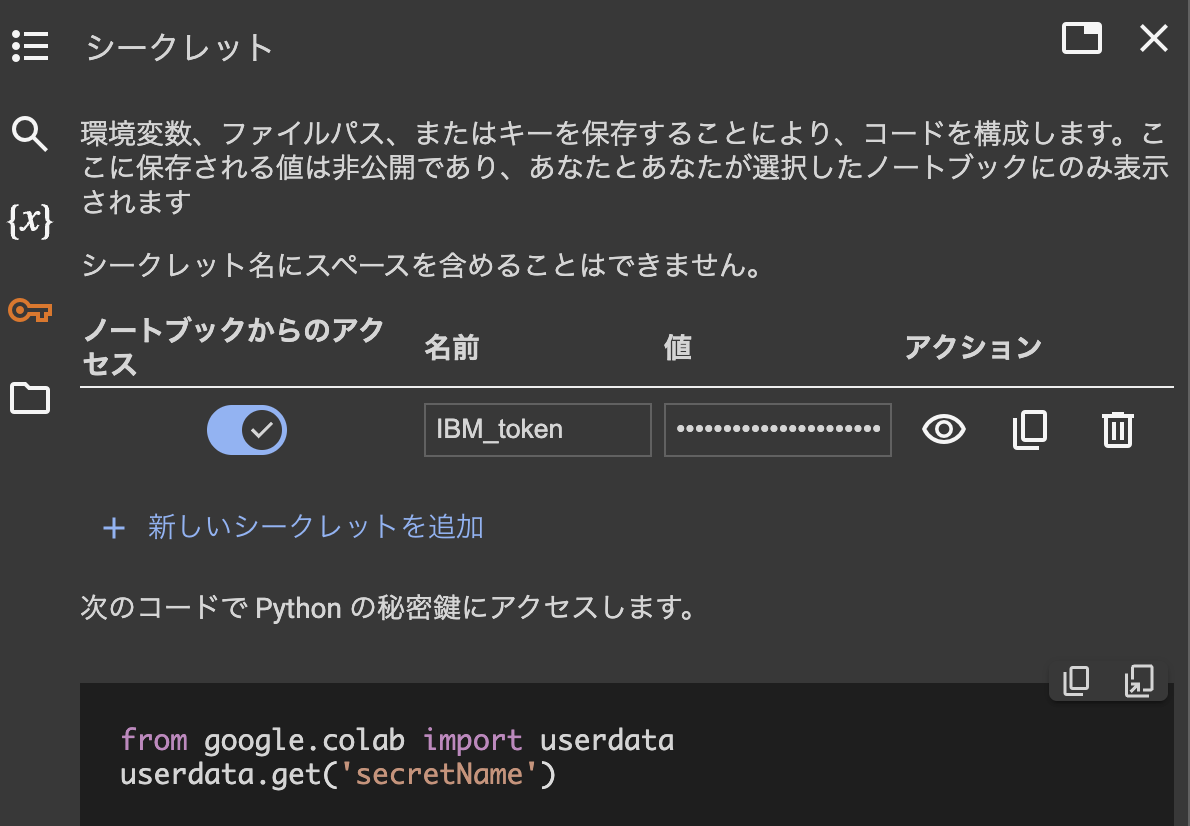

### セットアップ

In [2]:
def install_packages(use_IBMQ):
    print("Install packages!")
    import subprocess
    print("Installing qiskit. . .")
    subprocess.run(["pip", "install", "qiskit==0.46.0"])
    print("Installing qiskit-aer. . .")
    subprocess.run(["pip", "install", "qiskit-aer==0.13.3"])
    print("Installing qiskit-ibmq-provider. . .")
    subprocess.run(["pip", "install", "qiskit-ibmq-provider==0.20.2"])
    print("Installing pylatexenc. . .")
    subprocess.run(["pip", "install", "pylatexenc"])
    # if use_IBMQ:
    print("Installation completed.")

def import_test(use_IBMQ):
    print("Check import. . .")
    from qiskit import Aer, ClassicalRegister
    from qiskit import QuantumCircuit, QuantumRegister
    from qiskit.visualization import array_to_latex
    from qiskit.visualization import plot_bloch_multivector
    from qiskit.visualization import plot_histogram

    if use_IBMQ:
        from qiskit import IBMQ, ClassicalRegister, transpile
        from qiskit.providers.ibmq import least_busy
        from qiskit.tools.monitor import job_monitor
    print("Import was successful.")

def setup(use_IBMQ=True):
    install_packages(use_IBMQ)
    import_test(use_IBMQ)


In [3]:
setup(use_IBMQ)
if use_IBMQ:
    from google.colab import userdata
    token = userdata.get('IBM_token')

Install packages!
Installing qiskit. . .
Installing qiskit-aer. . .
Installing qiskit-ibmq-provider. . .
Installing pylatexenc. . .
Installation completed.
Check import. . .


<ipython-input-2-235fd256fc42>:32: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import_test(use_IBMQ)
<ipython-input-2-235fd256fc42>:26: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor


Import was successful.


# 動作テスト

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, Aer
n=2
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)
qc.h(qr)
qc.draw()

┌───┐
q0_0: ┤ H ├
      ├───┤
q0_1: ┤ H ├
      └───┘

In [5]:
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<ipython-input-5-2a7c085e7201>:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  sim = Aer.get_backend('statevector_simulator')


<IPython.core.display.Latex object>

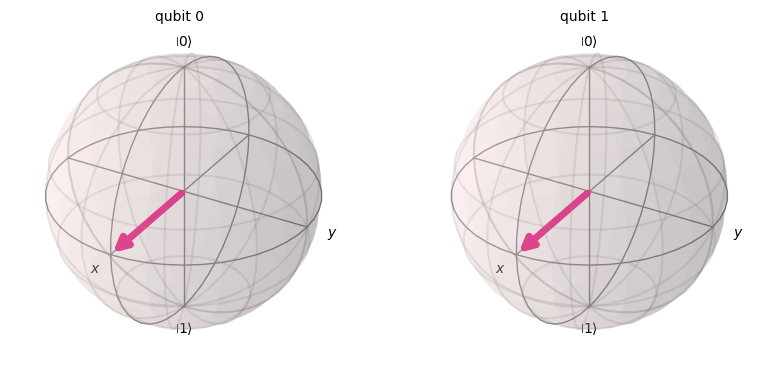

In [6]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state)

In [7]:
from qiskit import IBMQ
IBMQ.save_account(token)
provider = IBMQ.load_account()

<ipython-input-7-e7535e7e53b0>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(token)


In [8]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(simulator=False, operational=True))
print(backend)

ibm_kyoto


In [10]:
from qiskit import IBMQ, ClassicalRegister, transpile

shots = backend.configuration().max_shots
cr = ClassicalRegister(2,'creg')
qc.add_register(cr)
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])

In [11]:
from qiskit import transpile
qc_real = transpile(qc, backend=backend)
job = backend.run(qc_real, shots=shots)

In [12]:
from qiskit.tools.monitor import job_monitor
job_monitor(job, interval=5)

Job Status: job is queued (None)

KeyboardInterrupt: 

In [ ]:
res_real = job.result()
print(res_real)

In [ ]:
from qiskit.visualization import plot_histogram
ans = res_real.get_counts()
plot_histogram(ans)